In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from keras.layers import Conv2D, Dense, Flatten, MaxPool2D, Dropout
from keras.models import load_model

In [2]:
imgs_path = "./data/Train/"
data = []
labels = []
CLASSES = 43
# using for loop to access each image
for i in range(CLASSES):
    img_path = os.path.join(imgs_path, str(i)) #0-42
    for img in os.listdir(img_path):
        im = Image.open(imgs_path + '/' + str(i) + '/' + img)
        im = im.resize((30,30))
        im = np.array(im)
        data.append(im)
        labels.append(i)
data = np.array(data)
labels = np.array(labels)

In [3]:
x_train, x_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)
print("training shape: ",x_train.shape, y_train.shape)
print("testing shape: ",x_test.shape, y_test.shape)

training shape:  (31367, 30, 30, 3) (31367,)
testing shape:  (7842, 30, 30, 3) (7842,)


In [4]:
# convert interge label to one-hot data
y_train = to_categorical(y_train, 43)
y_test = to_categorical(y_test, 43)

In [5]:
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(5,5), activation="relu", input_shape=x_train.shape[1:]))
model.add(Conv2D(filters=32, kernel_size=(5,5), activation="relu"))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(rate=0.25))
model.add(Conv2D(filters=64, kernel_size=(3,3), activation="relu"))
model.add(Conv2D(filters=64, kernel_size=(3,3), activation="relu"))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(rate=0.25))
model.add(Flatten())
model.add(Dense(256, activation="relu"))
model.add(Dropout(rate=0.5))
model.add(Dense(43, activation="softmax"))


model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        2432      
                                                                 
 conv2d_1 (Conv2D)           (None, 22, 22, 32)        25632     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 11, 11, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 11, 11, 32)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 9, 9, 64)          18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 7, 7, 64)          36928     
                                                        

In [6]:
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

In [7]:
epochs = 15
history = model.fit(x_train, y_train, epochs=epochs, batch_size=64, validation_data=(x_test, y_test))

Epoch 1/15
491/491 [==============================] - 54s 106ms/step - loss: 2.6101 - accuracy: 0.3664 - val_loss: 1.0141 - val_accuracy: 0.7349
Epoch 2/15
491/491 [==============================] - 47s 96ms/step - loss: 1.1271 - accuracy: 0.6664 - val_loss: 0.5270 - val_accuracy: 0.8536
Epoch 3/15
491/491 [==============================] - 49s 100ms/step - loss: 0.8219 - accuracy: 0.7560 - val_loss: 0.3463 - val_accuracy: 0.9047
Epoch 4/15
491/491 [==============================] - 50s 102ms/step - loss: 0.6853 - accuracy: 0.7944 - val_loss: 0.3461 - val_accuracy: 0.9100
Epoch 5/15
491/491 [==============================] - 53s 107ms/step - loss: 0.6115 - accuracy: 0.8131 - val_loss: 0.2549 - val_accuracy: 0.9336
Epoch 6/15
491/491 [==============================] - 50s 103ms/step - loss: 0.5601 - accuracy: 0.8283 - val_loss: 0.2975 - val_accuracy: 0.9104
Epoch 7/15
491/491 [==============================] - 52s 105ms/step - loss: 0.5192 - accuracy: 0.8415 - val_loss: 0.1792 - val_acc

# Testing

In [10]:
from sklearn.metrics import accuracy_score
test = pd.read_csv("./data/Test.csv")
test_labels = test['ClassId'].values.tolist()

test_img_path = "./data"
test_imgs = test['Path'].values
test_data = []

In [11]:
for img in test_imgs:
    im = Image.open(test_img_path + '/' + img)
    im = im.resize((30,30))
    im = np.array(im)
    test_data.append(im)
test_data = np.array(test_data)
predictions = model.predict(test_data)
classes_x = np.argmax(predictions, axis = 1).tolist()
classes_x = np.array([classes_x]).tolist()[0]

print("accuracy: ", accuracy_score(test_labels, classes_x))

395/395 [==============================] - 5s 12ms/step
accuracy:  0.9265241488519398


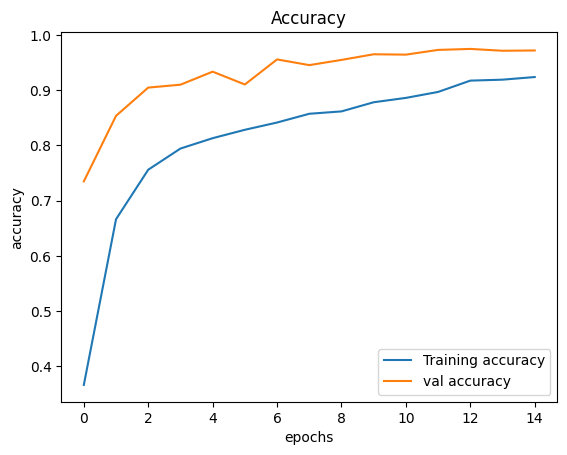

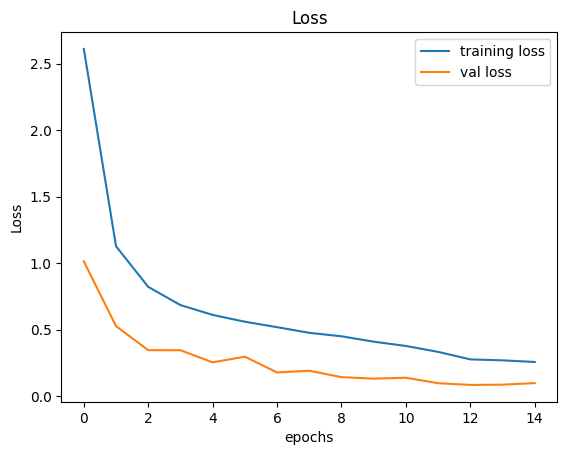

In [12]:
plt.figure(0) #underfitting
plt.plot(history.history['accuracy'], label="Training accuracy")
plt.plot(history.history['val_accuracy'], label="val accuracy")
plt.title("Accuracy")
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.legend()

plt.figure(1) #overfiting
plt.plot(history.history['loss'], label="training loss")
plt.plot(history.history['val_loss'], label="val loss")
plt.title("Loss")
plt.xlabel("epochs")
plt.ylabel("Loss")
plt.legend()

plt.show()

In [13]:
model.save("./traffic_sign_model_2.h5")